# Beginners Machine Learning with the titanic dataset

In [1]:
# Loading some of the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Loading the datasets used here
train_data = pd.read_csv(r'C:\adrian kasito\adrian\train_titanic.txt')
test_data = pd.read_csv(r'C:\adrian kasito\adrian\test_titanic.txt')
y = train_data['Survived']

In [3]:
y.shape

(891,)

In [4]:
# Reading the above data
print(y, train_data, test_data)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4      

In [5]:
# Size of the datasets


train_data.shape, test_data.shape

((891, 12), (418, 11))

DATA ANALYSIS AND DATA VISUALIZATION

In [6]:
# Data description
train_data.describe(), test_data.describe()

(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  ,
        PassengerId      Pclass         Age       SibSp      

In [7]:
# Percentage number of those who survived by their sex
sexes = train_data.groupby('Sex').mean()
sexes['Survived']*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [8]:
# Percentage number of those who survived by their class
sexes = train_data.groupby('Pclass').mean()
sexes['Survived']*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [9]:
# Total number of people who survived and those who didn't make it labelled by 1 and 0 respectively 
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
# Percentage number of those who survived by SibSp and Unique SibSp_counts
KK = train_data.groupby('SibSp').mean()
KKK = KK['Survived']*100
SibSp_counts = train_data['SibSp'].value_counts()
print(KKK, SibSp_counts)

SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [11]:
# Percentage number of those who survived by Parch and Unique Parch_counts
PP = train_data.groupby('Parch').mean()
PPP = PP['Survived']*100
Parch_counts = train_data['Parch'].value_counts()
print(PPP, Parch_counts)

Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<IPython.core.display.Javascript object>


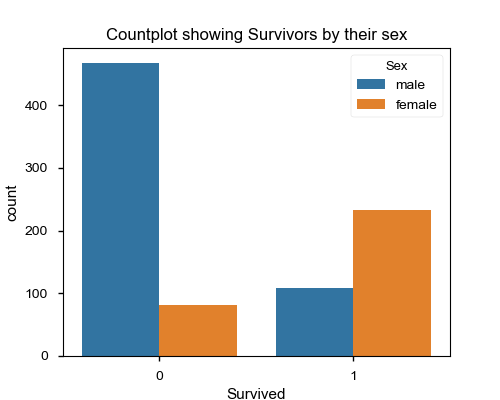

In [12]:

plt.figure(figsize=(5,4))
plt.style.use('seaborn-notebook')
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Countplot showing Survivors by their sex')
plt.show()

<IPython.core.display.Javascript object>


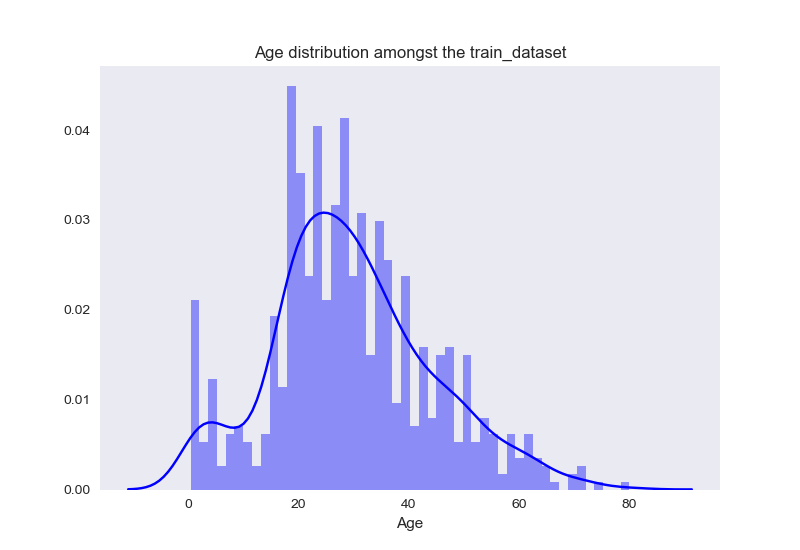

<IPython.core.display.Javascript object>


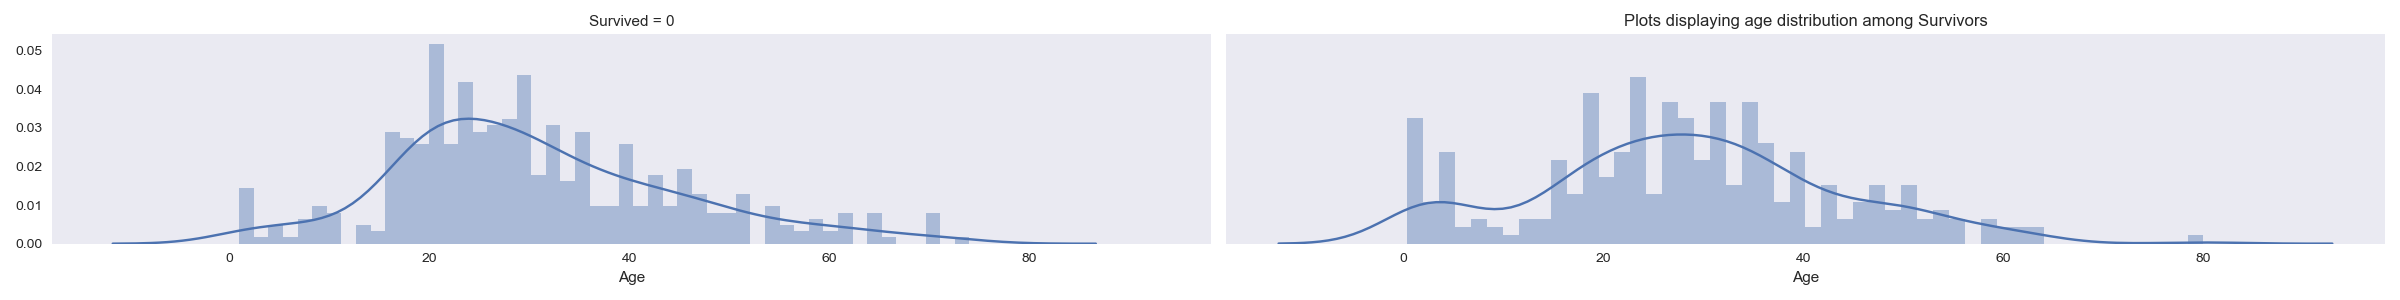

In [13]:
plt.figure()
plt.style.use('seaborn-dark')
sns.distplot(train_data['Age'], bins=50, kde=True, color='b')
plt.title('Age distribution amongst the train_dataset')
plt.show()

plt.style.use('seaborn-deep')
facet = sns.FacetGrid(data=train_data, col='Survived', height=3, aspect=4)
facet.map(sns.distplot, 'Age', kde=True, bins=50)
plt.title('Plots displaying age distribution among Survivors')
plt.show()

<IPython.core.display.Javascript object>


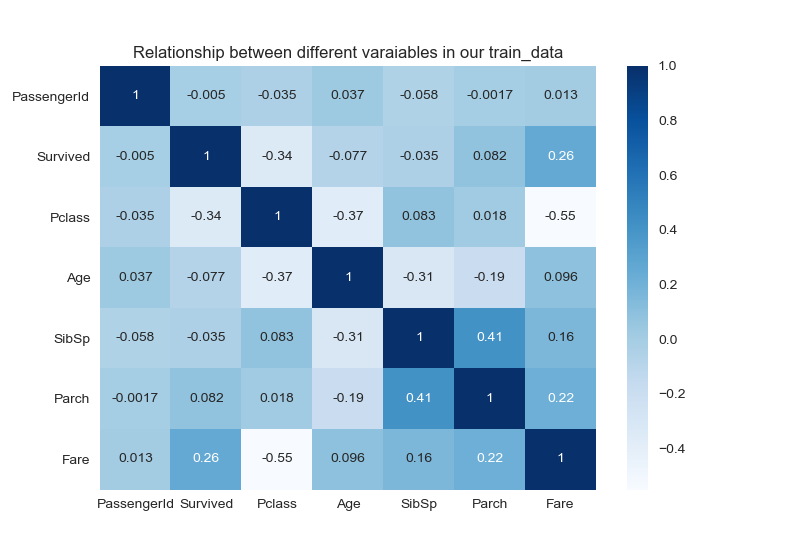

In [14]:
Relationship = train_data.corr()
plt.figure()
sns.heatmap(data=Relationship, annot=True, cmap='Blues')
plt.title('Relationship between different varaiables in our train_data')
plt.show()

In [15]:
def family(data):
    data['family_tog'] = data['Parch'] + data['SibSp']
    data = data.drop(['SibSp', 'Parch'], axis=1)
    return data
train_data = family(train_data)
test_data = family(test_data)

There is a defined function to help us show survival of people who were in families and it shows that those with larger families had a higher chance to survive

In [16]:
means = train_data.groupby('family_tog')
means.Survived.mean()*100

family_tog
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64

In [17]:
train_data['family_tog'] = train_data['family_tog'].apply(lambda x: 'Travelled alone' if x==0 else x)
train_data['family_tog'] = train_data['family_tog'].apply(lambda x: 'Travelled with small family' if (x==1 or x==2 or x==3) else x)
train_data['family_tog'] = train_data['family_tog'].apply(lambda x: 'Travelled with slightly big family' if (x==4 or x==5 or x==6) else x)
train_data['family_tog'] = train_data['family_tog'].apply(lambda x: 'Travelled with big family' if (x==7 or x==10) else x)


In [18]:
test_data['family_tog'] = test_data['family_tog'].apply(lambda x: 'Travelled alone' if x==0 else x)
test_data['family_tog'] = test_data['family_tog'].apply(lambda x: 'Travelled with small family' if (x==1 or x==2 or x==3) else x)
test_data['family_tog'] = test_data['family_tog'].apply(lambda x: 'Travelled with slightly big family' if (x==4 or x==5 or x==6) else x)
test_data['family_tog'] = test_data['family_tog'].apply(lambda x: 'Travelled with big family' if (x==7 or x==10) else x)


Ideally this is a new column called 'family_tog' which shows how people were travelling while on the titanic i.e; those who were in small numbers, big or small families and so on... From this feature we can find out who amongst these had a higher chance of survival

In [19]:
print(train_data['family_tog'].value_counts(), test_data['family_tog'].value_counts())

Travelled alone                       537
Travelled with small family           292
Travelled with slightly big family     49
Travelled with big family              13
Name: family_tog, dtype: int64 Travelled alone                       253
Travelled with small family           145
Travelled with slightly big family     14
Travelled with big family               6
Name: family_tog, dtype: int64


<IPython.core.display.Javascript object>


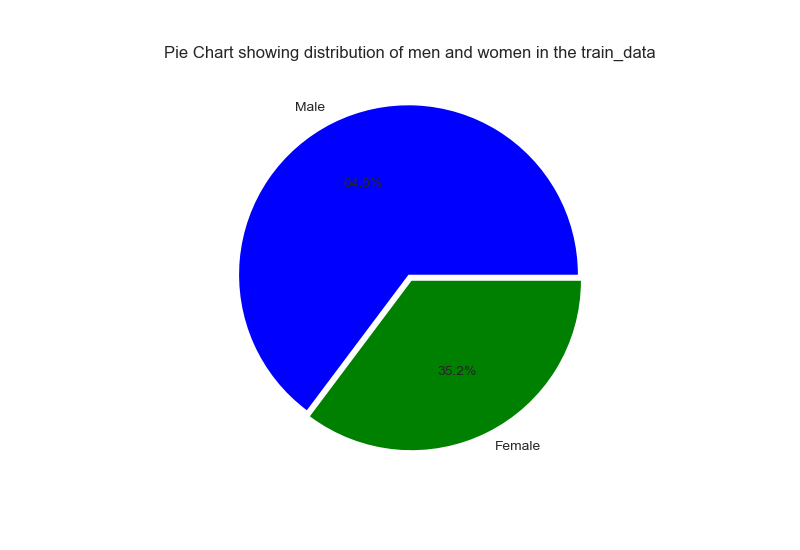

<IPython.core.display.Javascript object>


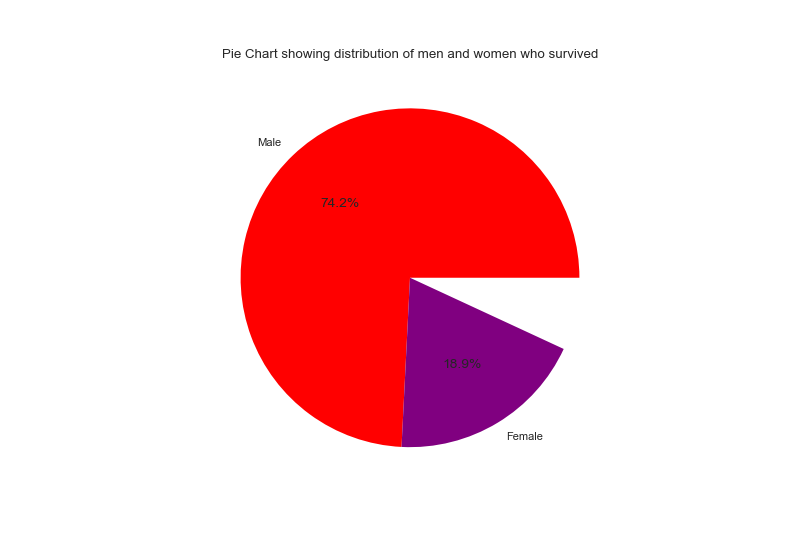

<IPython.core.display.Javascript object>


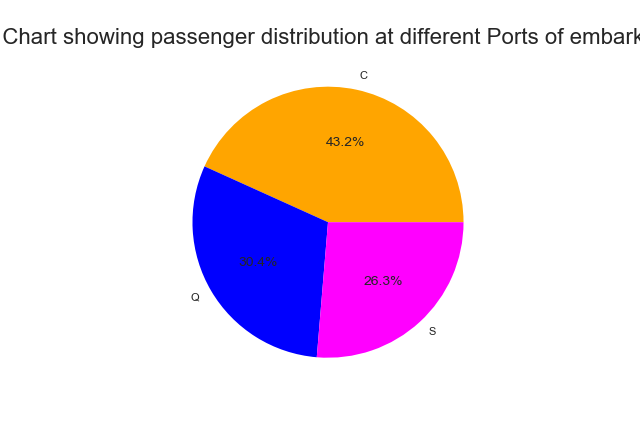

<IPython.core.display.Javascript object>


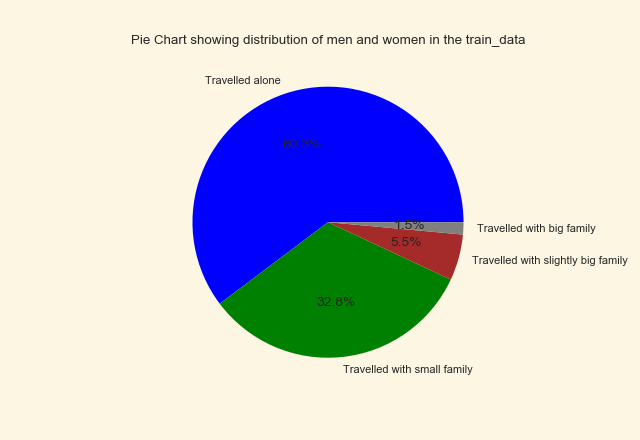

In [20]:
# Pie_Chart 
# More visualizations on the data
plt.figure()
plt.style.use('seaborn-muted')
plt.pie(train_data.Sex.value_counts(), explode=[0.02, 0.02], labels= ['Male', 'Female'], autopct='%1.1f%%', colors=['b','g'])
plt.title('Pie Chart showing distribution of men and women in the train_data')
plt.show()

plt.figure()
plt.style.use('seaborn-paper')
sexes = train_data.groupby('Sex').mean()
plt.pie(sexes.Survived, labels= ['Male', 'Female'], autopct='%1.1f%%', colors=['red','purple'])
plt.title('Pie Chart showing distribution of men and women who survived')
plt.show()

plt.figure()
plt.style.use('Solarize_Light2')
sexes = train_data.groupby('Embarked').mean()
plt.pie(sexes.Survived, labels= ['C', 'Q', 'S'], autopct='%1.1f%%', colors=['orange','blue', 'magenta'])
plt.title('Pie Chart showing passenger distribution at different Ports of embarkation')
plt.show()

plt.figure()
plt.style.use('seaborn-paper')
plt.pie(train_data['family_tog'].value_counts(), labels= ['Travelled alone', 'Travelled with small family', 'Travelled with slightly big family', 'Travelled with big family'], autopct='%1.1f%%', colors=['b','g', 'brown', 'grey'])
plt.title('Pie Chart showing distribution of men and women in the train_data')
plt.show()

Looking at the 'Fare' feature, it can also come in handy with predictions depending on how much one had to pay to be on the titanic

In [21]:
train_data['Fare'].nunique()

248

In [22]:
train_data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

<IPython.core.display.Javascript object>


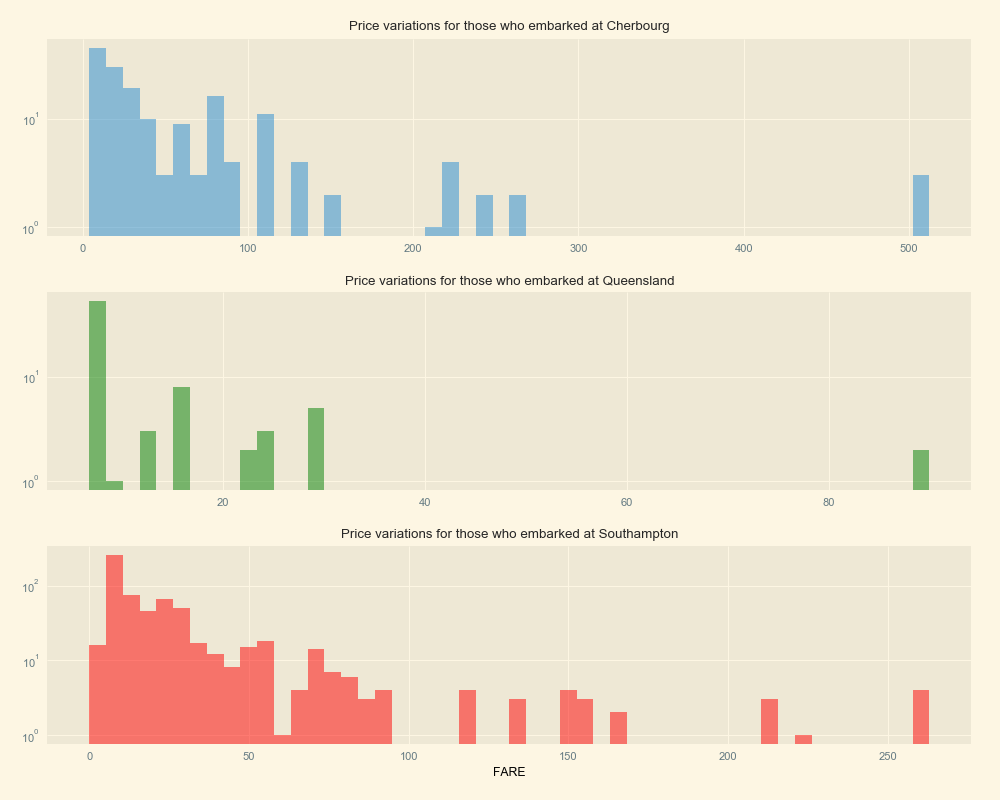

In [23]:
# Price variations at the different ports of embarkation
plt.style.use('seaborn-paper')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,8))
ax1.hist(train_data.Fare[train_data.Embarked == 'C'], bins=50, alpha=0.5)
ax1.set_yscale('log')
ax1.set_title('Price variations for those who embarked at Cherbourg')
plt.show()
plt.xlabel('FARE', color='black')
plt.tight_layout(pad=1.50)

plt.style.use('seaborn-paper')
ax2.hist(train_data.Fare[train_data.Embarked == 'Q'], bins=50, alpha=0.5, color='g')
ax2.set_yscale('log')
ax2.set_title('Price variations for those who embarked at Queensland')
plt.show()
plt.tight_layout(pad=1.50)

plt.style.use('seaborn-paper')
ax3.hist(train_data.Fare[train_data.Embarked == 'S'], bins=50, alpha=0.5, color='r')
ax3.set_yscale('log')
ax3.set_title('Price variations for those who embarked at Southampton')
plt.show()

Looking at the 'Name' feature, it's important to note that different names have different titles.. i beleive this can also be utilized in our predictions

In [24]:
train_data['Name'] = train_data['Name'].apply(lambda x: x.split('.')[0].split(',')[1])
test_data['Name'] = test_data['Name'].apply(lambda x: x.split('.')[0].split(',')[1])

In [25]:
train_data['Name'].value_counts(), test_data['Name'].value_counts()

( Mr              517
  Miss            182
  Mrs             125
  Master           40
  Dr                7
  Rev               6
  Col               2
  Major             2
  Mlle              2
  Capt              1
  the Countess      1
  Ms                1
  Don               1
  Mme               1
  Lady              1
  Sir               1
  Jonkheer          1
 Name: Name, dtype: int64,
  Mr        240
  Miss       78
  Mrs        72
  Master     21
  Rev         2
  Col         2
  Ms          1
  Dona        1
  Dr          1
 Name: Name, dtype: int64)

<IPython.core.display.Javascript object>


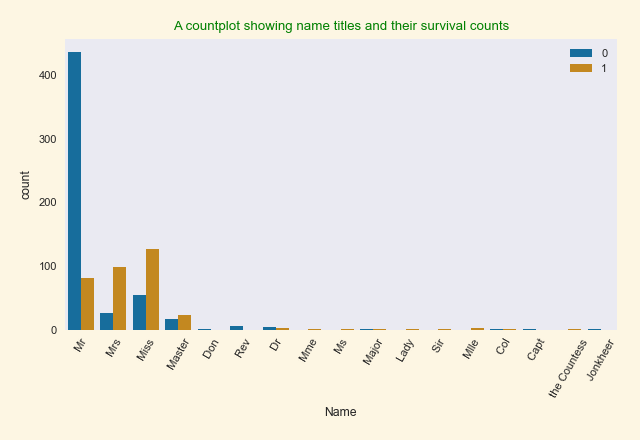

In [26]:
plt.figure()
plt.style.use('seaborn-dark')
sns.countplot(x='Name', hue='Survived', data=train_data, palette='colorblind')
plt.xticks(rotation=60)
plt.title('A countplot showing name titles and their survival counts', color='g')
plt.show()
plt.legend(loc='upper right')
plt.tight_layout(pad=1.50)

<IPython.core.display.Javascript object>


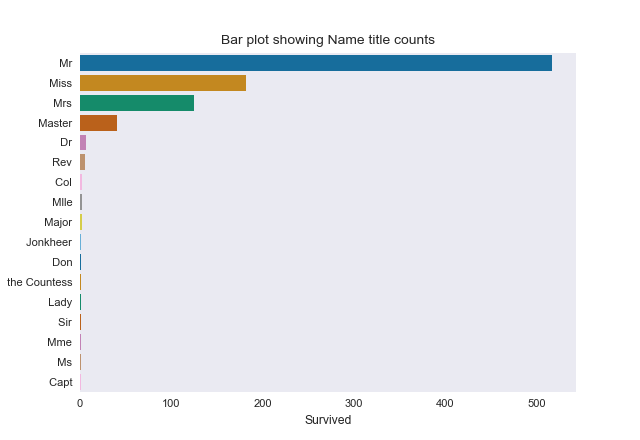

In [27]:
title = pd.DataFrame(train_data.groupby('Name')['Survived'].agg('count').sort_values(ascending=False))
plt.figure()
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (8,6)
sns.barplot(x=title.Survived, y=title.index, data=title, palette='colorblind')
plt.gca().set_title('Bar plot showing Name title counts', fontsize=(10))
plt.show()

In [28]:
train_data['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
F G63          1
E49            1
E12            1
E63            1
D50            1
Name: Cabin, Length: 147, dtype: int64

In [29]:
train_data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
347088      6
           ..
343120      1
36866       1
237789      1
2695        1
113784      1
Name: Ticket, Length: 681, dtype: int64

In [30]:
train_data['Cabin'].isnull().sum(), test_data['Cabin'].isnull().sum()

(687, 327)

In [31]:
train_data['Cabin'].fillna('Reserved', inplace=True), test_data['Cabin'].fillna('Reserved', inplace=True)

(None, None)

In [32]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_tog
0,1,0,3,Mr,male,22.0,A/5 21171,7.2500,Reserved,S,Travelled with small family
1,2,1,1,Mrs,female,38.0,PC 17599,71.2833,C85,C,Travelled with small family
2,3,1,3,Miss,female,26.0,STON/O2. 3101282,7.9250,Reserved,S,Travelled alone
3,4,1,1,Mrs,female,35.0,113803,53.1000,C123,S,Travelled with small family
4,5,0,3,Mr,male,35.0,373450,8.0500,Reserved,S,Travelled alone
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,male,27.0,211536,13.0000,Reserved,S,Travelled alone
887,888,1,1,Miss,female,19.0,112053,30.0000,B42,S,Travelled alone
888,889,0,3,Miss,female,NaN,W./C. 6607,23.4500,Reserved,S,Travelled with small family
889,890,1,1,Mr,male,26.0,111369,30.0000,C148,C,Travelled alone


In [33]:
train_data['Cabin'].value_counts()

Reserved       687
C23 C25 C27      4
B96 B98          4
G6               4
E101             3
              ... 
F G63            1
E49              1
E12              1
E63              1
D50              1
Name: Cabin, Length: 148, dtype: int64

In [34]:
train_data['deck'] = train_data['Cabin'].str.replace('([0-9\s])+', '')
test_data['deck'] = test_data['Cabin'].str.replace('([0-9\s])+', '')

In [35]:
test_data['deck'].value_counts(), train_data['deck'].value_counts()

(Reserved    327
 C            29
 B            12
 D            12
 E             8
 A             7
 F             5
 CC            4
 BBBB          3
 CCC           2
 BBB           2
 FE            2
 G             1
 BB            1
 FG            1
 DD            1
 EE            1
 Name: deck, dtype: int64,
 Reserved    687
 C            51
 B            36
 D            32
 E            32
 A            15
 F             9
 BB            7
 CCC           4
 G             4
 CC            4
 FG            3
 BBBB          2
 BBB           2
 FE            1
 T             1
 DD            1
 Name: deck, dtype: int64)

The 'Cabin' feature has very many missing values much as it would be good for our predictions since someone's position on the titanic can also help with our predictions.
So i will call the missing values 'Reserved', assuming those are reserved spots

In [36]:
def number_of_cabins(row):
    if len(row.deck) > 1:
       row['Cabin'] = len(row.deck)
    elif row.deck == 'Reserved':
        row['Cabin'] = 0
    else:
        row['Cabin'] = 1
    return row
train_data = train_data.apply(number_of_cabins, axis=1)
test_data = test_data.apply(number_of_cabins, axis=1)

In [37]:
train_data['Cabin'].value_counts(), test_data['Cabin'].value_counts()

(8    687
 1    180
 2     16
 3      6
 4      2
 Name: Cabin, dtype: int64,
 8    327
 1     74
 2     10
 3      4
 4      3
 Name: Cabin, dtype: int64)

In [38]:
train_data['deck'] = train_data['deck'].apply(lambda x: x[0] if x != 'Reserved' else x)
test_data['deck'] = test_data['deck'].apply(lambda x: x[0] if x != 'Reserved' else x)

In [39]:
train_data['deck'].value_counts(), test_data['deck'].value_counts()

(Reserved    687
 C            59
 B            47
 D            33
 E            32
 A            15
 F            13
 G             4
 T             1
 Name: deck, dtype: int64,
 Reserved    327
 C            35
 B            18
 D            13
 E             9
 F             8
 A             7
 G             1
 Name: deck, dtype: int64)

Since the 'Age' feature will be utilized, missing values are replaced with mean age of the other travellers with whom they have the same name title.
I believe that makes more sense.

In [40]:
for title in train_data[train_data.Age.isna()].Name.value_counts().index:
    mean_age = train_data.groupby('Name').mean().T[title].Age
    mean_age_list = train_data[train_data.Name == title].Age.fillna(mean_age)
    train_data.update(mean_age_list)
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
Embarked       2
family_tog     0
deck           0
dtype: int64

In [41]:
for title in test_data[test_data.Age.isnull()].Name.value_counts().index:
    mean_age = test_data.groupby('Name').mean().T[title].Age
    mean_age_list = test_data[test_data.Name == title].Age.fillna(mean_age)
    test_data.update(mean_age_list)
test_data.Age.isna().sum()

1

In [42]:
test_data['Age'] = test_data.Age.fillna(test_data.Age.mean())

In [43]:
test_data.Age.isnull().sum()

0

Missing 'Fare' feature values are replaced with the average fare paid for the travellers on the titanic

In [44]:
most_paid_fare = test_data.Fare.value_counts()
test_data.Fare = test_data.Fare.fillna(most_paid_fare.index[0])

Missing 'Embarked' feature values replaced with the port of embarkation at which most people boarded the titanic

In [45]:
most_frequent_port_of_embarkation = train_data.Embarked.value_counts()
port = most_frequent_port_of_embarkation
port

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
train_data.Embarked = train_data.Embarked.fillna(port.index[0])

In [47]:
train_data.drop(['PassengerId','Survived', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['PassengerId','Ticket', 'Cabin'], axis=1, inplace=True)

In [48]:
train_data

,Pclass,Name,Sex,Age,Fare,Embarked,family_tog,deck
0,3,Mr,male,22.000000,7.2500,S,Travelled with small family,Reserved
1,1,Mrs,female,38.000000,71.2833,C,Travelled with small family,C
2,3,Miss,female,26.000000,7.9250,S,Travelled alone,Reserved
3,1,Mrs,female,35.000000,53.1000,S,Travelled with small family,C
4,3,Mr,male,35.000000,8.0500,S,Travelled alone,Reserved
...,...,...,...,...,...,...,...,...
886,2,Rev,male,27.000000,13.0000,S,Travelled alone,Reserved
887,1,Miss,female,19.000000,30.0000,S,Travelled alone,B
888,3,Miss,female,21.773973,23.4500,S,Travelled with small family,Reserved
889,1,Mr,male,26.000000,30.0000,C,Travelled alone,C


In [49]:
# Using OneHotEncoder to deal with categorical features to create dummies
from sklearn.preprocessing import OneHotEncoder
Enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
features = ['Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Embarked', 'family_tog', 'deck']
Enc_train_cols = pd.DataFrame(Enc.fit_transform(train_data[features]))
Enc_test_cols = pd.DataFrame(Enc.transform(test_data[features]))

Enc_train_cols.index = train_data.index
Enc_test_cols.index = test_data.index

Trn = train_data.drop(features, axis=1)
Ten = test_data.drop(features, axis=1)

train_data = pd.concat([Trn, Enc_train_cols], axis=1)
test_data = pd.concat([Ten, Enc_test_cols], axis=1)

In [50]:
train_data.shape, test_data.shape

((891, 378), (418, 378))

In [51]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,368,369,370,371,372,373,374,375,376,377
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [53]:
steps = [('scaler', StandardScaler())]
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())])
param_grid={'classifier': [RandomForestClassifier()], 'classifier__n_estimators':[500], 'classifier__max_features':[0.25], 'classifier__max_depth':[8], 'classifier__criterion':['entropy']}
clf = GridSearchCV(pipe, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf = clf.fit(train_data, y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.7s finished


In [54]:
score = clf.best_score_
params = clf.best_params_
print('Best score : {}'.format(score))
print('Best parameters : {}'.format(params))

Best score : 0.8271535580524345
Best parameters : {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features=0.25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__max_features': 0.25, 'classifier__n_estimators': 500}


In [55]:
final_results = clf.predict(test_data)
final_results

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

Since i will need to use the passengerId for the test_data, i will have to load the dataset again to help me come up with my final prediction

In [56]:
test_data = pd.read_csv(r'C:\adrian kasito\adrian\test_titanic.txt')

In [57]:
Final_solution = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': final_results})
Final_solution

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
